In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sn

In [10]:
api_key = '' #put YOUR  API KEY
# all data involve on datascientist information
channel_ids = ['UCnz-ZXXER4jOvuED5trXfEA',# techTFQ
              'UCLLw7jmFsvfIVaUFsLs8mlQ',#Luke Barousse
              'UCiT9RITQ9PW6BhXK0y2jaeg',#Ken Jee
              ]
youtube = build('youtube','v3',developerKey = api_key)

## Function to get channel statistics

In [32]:
def get_channel_stats(youtube, channel_id):

    all_data = []
    request = youtube.channels().list(
        part = 'snippet,contentDetails,statistics',
        id =','.join(channel_ids) 
        )
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                    )
        all_data.append(data)
    
    return all_data

In [33]:
get_channel_stats(youtube, channel_ids)

[{'channel_name': 'Luke Barousse',
  'Subscribers': '393000',
  'Views': '18803249',
  'Total_videos': '142',
  'playlist_id': 'UULLw7jmFsvfIVaUFsLs8mlQ'},
 {'channel_name': 'techTFQ',
  'Subscribers': '251000',
  'Views': '13158172',
  'Total_videos': '100',
  'playlist_id': 'UUnz-ZXXER4jOvuED5trXfEA'},
 {'channel_name': 'Ken Jee',
  'Subscribers': '254000',
  'Views': '8705156',
  'Total_videos': '285',
  'playlist_id': 'UUiT9RITQ9PW6BhXK0y2jaeg'}]

In [34]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [35]:
channel_data = pd.DataFrame(channel_statistics)

In [36]:
channel_data

,channel_name,Subscribers,Views,Total_videos,playlist_id
0,Luke Barousse,393000,18803249,142,UULLw7jmFsvfIVaUFsLs8mlQ
1,Ken Jee,254000,8705156,285,UUiT9RITQ9PW6BhXK0y2jaeg
2,techTFQ,251000,13158172,100,UUnz-ZXXER4jOvuED5trXfEA


In [21]:
channel_data.dtypes

channel_name    object
Subscribers     object
Views           object
Total_videos    object
dtype: object

In [22]:
channel_data['Subscribers']= pd.to_numeric(channel_data['Subscribers'])
channel_data['Views']= pd.to_numeric(channel_data['Views'])
channel_data['Total_videos']= pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
dtype: object

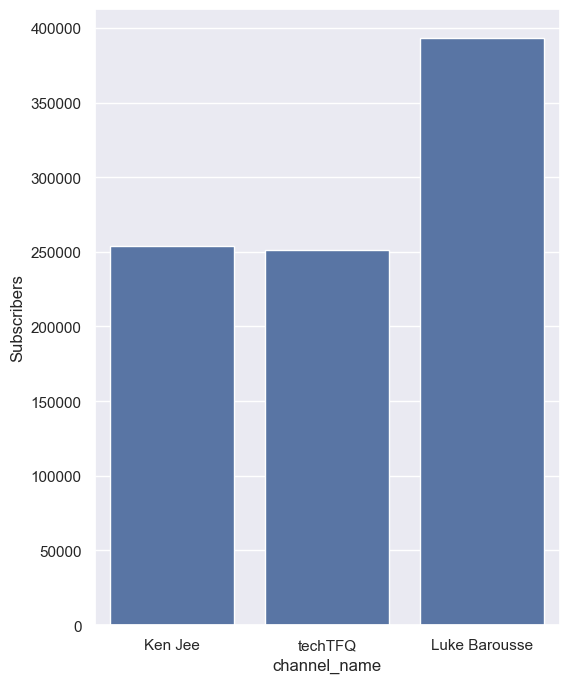

In [27]:
sn.set(rc = {'figure.figsize':(6,8)})
ax = sn.barplot(x = 'channel_name',  y ='Subscribers', data = channel_data)

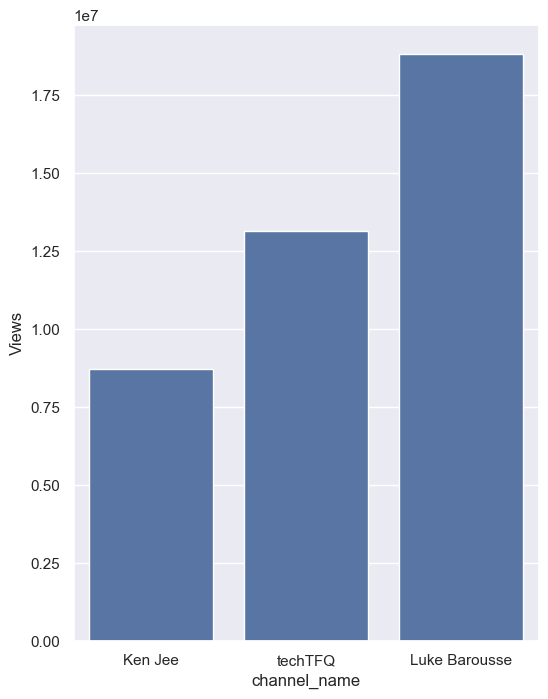

In [28]:
ax = sn.barplot(x = 'channel_name',  y ='Views', data = channel_data)

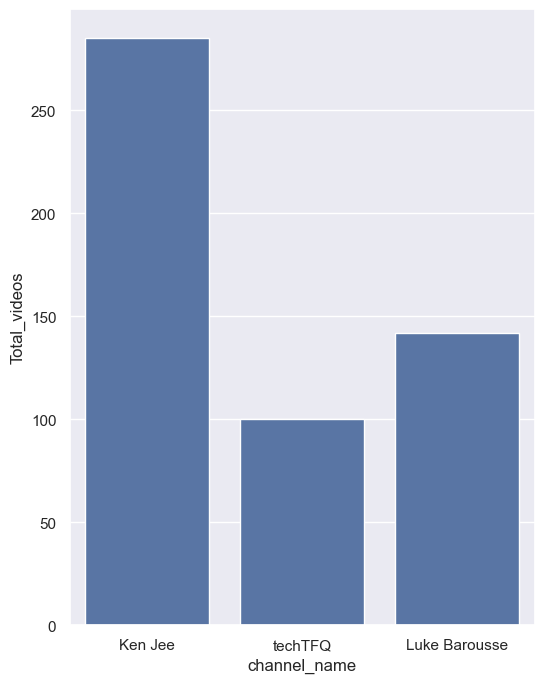

In [29]:
ax = sn.barplot(x = 'channel_name',  y ='Total_videos', data = channel_data)

In [43]:
playlist_id = channel_data.loc[channel_data['channel_name']== 'Ken Jee','playlist_id'].iloc[0]

In [44]:
playlist_id 

'UUiT9RITQ9PW6BhXK0y2jaeg'

## Function to get video ids

In [56]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list (
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults = 50
                )
    response = request.execute()
    
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else :
            request = youtube.playlistItems().list (
                        part = 'contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token
                        )
            response = request.execute()

            for i in range(len(response['items'])):
                    video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')

    return video_ids

In [57]:
video_ids =get_video_ids(youtube, playlist_id)

In [58]:
video_ids

['L5Cis5bOwgw',
 'M1I5HlzQges',
 'T_-0l0ORi5I',
 'w13zJB_jyBI',
 'oZ9rMrqyTbI',
 '6BrYKdqq4uA',
 '1dAvbIMrLos',
 'lqYxmYMkfK8',
 '-JTU734oMfk',
 'HVpbmu7rFYE',
 'NQQ3DRdXAXE',
 'xpi-M2j3NmE',
 'X07w7QFoLpc',
 'RRnThAtKuq0',
 'r3zOpjEOkgE',
 's-XYFEzy9Wc',
 'iBh1wl4o6V4',
 'L6lXKdP4Qbg',
 'xGDl6rlBygU',
 'SY6y6Y8C594',
 '1RUj2aLQx8I',
 'MkzZXSw1Glk',
 '9neDFXTxKxA',
 'UaNNVukM27g',
 '3lN0-S3symM',
 'M-AN8eWLxms',
 'MXFZhbvQqM8',
 '54n61XjKifI',
 'pyWYIRR8rrE',
 'onwRfbt--cw',
 'u6P23ouSYhA',
 'RMMVuvS7S_g',
 '5AwbPAV8FS0',
 'A2OQgU0IRNo',
 'x5Q_nrIqFik',
 '7ja2ELBVMlU',
 'Z2MyLQa_vVw',
 'JTlB9fwYRk0',
 'OJDf_fTENJ4',
 'nqCkdqhV-JY',
 'b8t8lDL13sg',
 't6CD1EwU5kc',
 'eIxHe45hzhQ',
 '3NJOWWvNK3I',
 '4_VtMWJSo1o',
 'OybXWl3IWvI',
 'nRHPQ5ZeB5Y',
 '0JWC4M0Qhqc',
 'oNvyvYGw5n4',
 'GaZRuchRCyw',
 'EBjYqC3aNTA',
 'QMP858aZcow',
 '0ItYIoOrrUs',
 'KzTFoUbThvM',
 'bBJd0oPdNak',
 'Yk-unX4KnV4',
 'z0_xrtFdFj8',
 'vVpkXEIn-q0',
 'aipz4p7GDL4',
 'iPdO9MwdcLE',
 'YPph59-rTxA',
 '-2U2CMYom00',
 'KEeUR8

## Function to get Video details.

In [73]:
def get_video_details(youtube, video_ids):

    all_video_stats = []
    for i in range(0,len(video_ids),50):
        request = youtube.videos().list(
            part = 'snippet,statistics',
            id = ','.join(video_ids[i:i+50])
                                        )
        response = request.execute()

        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               FavoriteCount = video['statistics']['favoriteCount'],
                               comments = video['statistics']['commentCount']
                            
                               )
            all_video_stats.append(video_stats)

    return all_video_stats

In [74]:
get_video_details(youtube, video_ids)

[{'Title': 'A Data Dream Come True',
  'published_date': '2023-11-17T12:00:28Z',
  'Views': '1473',
  'Likes': '74',
  'FavoriteCount': '0',
  'comments': '22'},
 {'Title': 'The Death of the Full-Time Job (Rise of the Contractor)',
  'published_date': '2023-09-22T11:46:35Z',
  'Views': '5366',
  'Likes': '362',
  'FavoriteCount': '0',
  'comments': '73'},
 {'Title': 'How to Survive a Down Data Job Market',
  'published_date': '2023-09-05T10:50:39Z',
  'Views': '16094',
  'Likes': '528',
  'FavoriteCount': '0',
  'comments': '64'},
 {'Title': 'The Harsh Reality of the Data Job Market',
  'published_date': '2023-08-24T11:30:19Z',
  'Views': '104942',
  'Likes': '2554',
  'FavoriteCount': '0',
  'comments': '292'},
 {'Title': '7 Industries AI will Aggressively Disrupt',
  'published_date': '2023-08-14T11:30:19Z',
  'Views': '5740',
  'Likes': '235',
  'FavoriteCount': '0',
  'comments': '41'},
 {'Title': "What's in My Data Science Travel Bag? (50+ Flights Last Year)",
  'published_date': 

In [75]:
video_details = get_video_details(youtube, video_ids)

In [78]:
video_data = pd.DataFrame(video_details)

In [79]:
video_data

,Title,published_date,Views,Likes,FavoriteCount,comments
0,A Data Dream Come True,2023-11-17T12:00:28Z,1473,74,0,22
1,The Death of the Full-Time Job (Rise of the Co...,2023-09-22T11:46:35Z,5366,362,0,73
2,How to Survive a Down Data Job Market,2023-09-05T10:50:39Z,16094,528,0,64
3,The Harsh Reality of the Data Job Market,2023-08-24T11:30:19Z,104942,2554,0,292
4,7 Industries AI will Aggressively Disrupt,2023-08-14T11:30:19Z,5740,235,0,41
...,...,...,...,...,...,...
280,How to Simulate NBA Games in Python,2018-11-19T23:31:49Z,17900,396,0,54
281,Should You Get A Masters in Data Science?,2018-11-14T01:39:33Z,20627,305,0,135
282,How I Became A Data Scientist From a Business ...,2018-11-12T00:26:08Z,6487,197,0,23
283,Predicting Season Long NBA Wins Using Multiple...,2018-07-10T16:39:52Z,8806,192,0,17


In [81]:
video_data['published_date'] = pd.to_datetime(video_data['published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['FavoriteCount'] = pd.to_numeric(video_data['FavoriteCount'])
video_data['comments'] = pd.to_numeric(video_data['comments'])
video_data


,Title,published_date,Views,Likes,FavoriteCount,comments
0,A Data Dream Come True,2023-11-17,1473,74,0,22
1,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,5366,362,0,73
2,How to Survive a Down Data Job Market,2023-09-05,16094,528,0,64
3,The Harsh Reality of the Data Job Market,2023-08-24,104942,2554,0,292
4,7 Industries AI will Aggressively Disrupt,2023-08-14,5740,235,0,41
...,...,...,...,...,...,...
280,How to Simulate NBA Games in Python,2018-11-19,17900,396,0,54
281,Should You Get A Masters in Data Science?,2018-11-14,20627,305,0,135
282,How I Became A Data Scientist From a Business ...,2018-11-12,6487,197,0,23
283,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8806,192,0,17


Top ten videos that has many views

In [84]:
Top10_videos = video_data.sort_values(by = 'Views', ascending= False).head(10)
Top10_videos

,Title,published_date,Views,Likes,FavoriteCount,comments
187,How I Would Learn Data Science (If I Had to St...,2020-05-08,1395954,49013,0,1993
208,The Best Free Data Science Courses Nobody is T...,2020-03-09,347318,21220,0,620
67,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,342424,15019,0,536
163,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,337234,7428,0,430
214,3 Proven Data Science Projects for Beginners (...,2020-02-17,328606,17827,0,526
200,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,199292,5060,0,175
253,The Projects You Should Do To Get A Data Scien...,2019-07-30,151569,5721,0,255
100,Why You Probably Won't Become a Data Scientist,2021-04-09,138479,4040,0,481
184,How to Make A Data Science Portfolio Website w...,2020-05-15,131952,4470,0,193
115,How I Would Learn Data Science in 2021 (What H...,2020-12-19,131542,5965,0,488


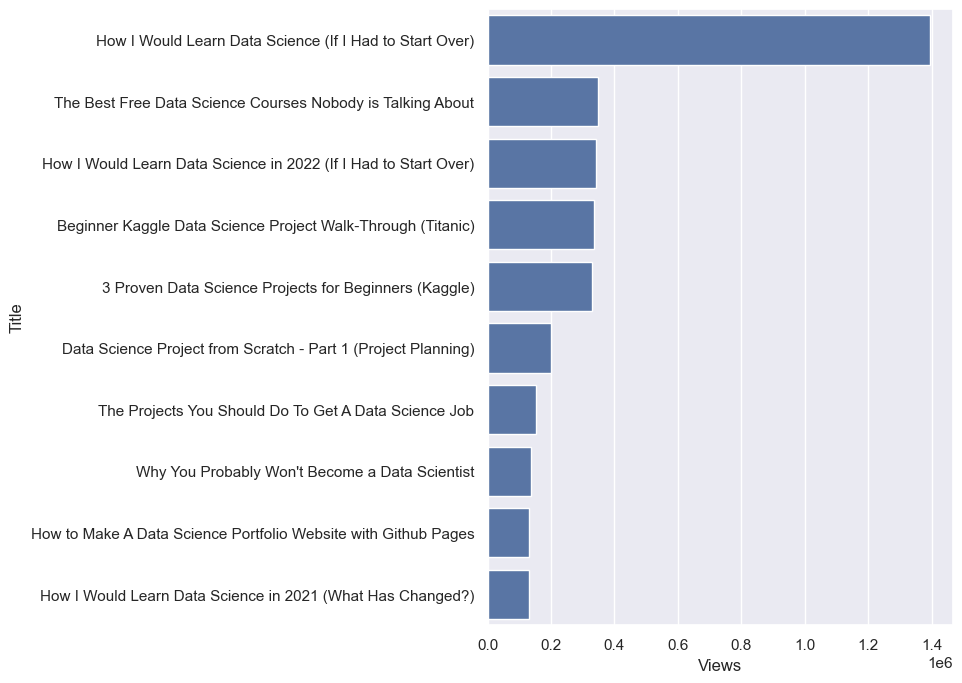

In [85]:
ax1 = sn.barplot(x ='Views', y = 'Title', data = Top10_videos)

In [86]:
video_data

,Title,published_date,Views,Likes,FavoriteCount,comments
0,A Data Dream Come True,2023-11-17,1473,74,0,22
1,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,5366,362,0,73
2,How to Survive a Down Data Job Market,2023-09-05,16094,528,0,64
3,The Harsh Reality of the Data Job Market,2023-08-24,104942,2554,0,292
4,7 Industries AI will Aggressively Disrupt,2023-08-14,5740,235,0,41
...,...,...,...,...,...,...
280,How to Simulate NBA Games in Python,2018-11-19,17900,396,0,54
281,Should You Get A Masters in Data Science?,2018-11-14,20627,305,0,135
282,How I Became A Data Scientist From a Business ...,2018-11-12,6487,197,0,23
283,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8806,192,0,17


In [88]:
video_data['Month'] = pd.to_datetime(video_data['published_date']).dt.strftime('%b')
video_data

,Title,published_date,Views,Likes,FavoriteCount,comments,Month
0,A Data Dream Come True,2023-11-17,1473,74,0,22,Nov
1,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,5366,362,0,73,Sep
2,How to Survive a Down Data Job Market,2023-09-05,16094,528,0,64,Sep
3,The Harsh Reality of the Data Job Market,2023-08-24,104942,2554,0,292,Aug
4,7 Industries AI will Aggressively Disrupt,2023-08-14,5740,235,0,41,Aug
...,...,...,...,...,...,...,...
280,How to Simulate NBA Games in Python,2018-11-19,17900,396,0,54,Nov
281,Should You Get A Masters in Data Science?,2018-11-14,20627,305,0,135,Nov
282,How I Became A Data Scientist From a Business ...,2018-11-12,6487,197,0,23,Nov
283,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,8806,192,0,17,Jul


In [92]:
videos_per_month = video_data.groupby('Month', as_index= False).size()
videos_per_month

,Month,size
0,Apr,22
1,Aug,27
2,Dec,20
3,Feb,25
4,Jan,29
5,Jul,27
6,Jun,20
7,Mar,32
8,May,24
9,Nov,21


In [93]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [94]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered= True)

In [ ]:
videos_per_month.sort_index()

In [97]:
videos_per_month = videos_per_month.sort_index()
videos_per_month

,Month,size
Month,,
Jan,Jan,29
Feb,Feb,25
Mar,Mar,32
Apr,Apr,22
May,May,24
Jun,Jun,20
Jul,Jul,27
Aug,Aug,27
Sep,Sep,21


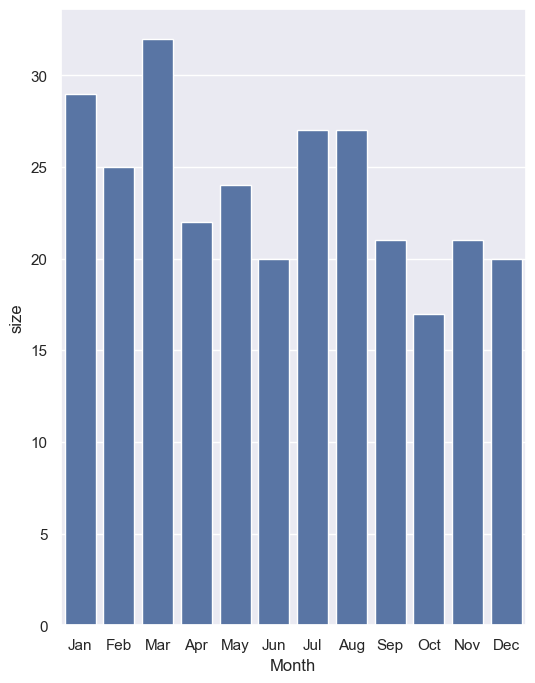

In [98]:
ax2 = sn.barplot(x = 'Month', y ='size', data = videos_per_month)

In [101]:
video_data.to_csv('Video_Details.csv') 